# 1 数据载入及初步观察

### 1.1 载入并了解数据

In [3]:
# 导入numpy和pandas
import numpy as np
import pandas as pd
import os

数据读取与保存  
读取：pd.read_csv('')  
保存：df.to_csv('train_chinese.csv')

In [4]:
# 载入数据-绝对路径
# 相对路径- df = pd.read_csv('train.csv')-注意文档存储位置在jupyter中的根目录下
df = pd.read_csv(r'E:\软件下载\jupyter\泰坦尼克号\数据\train.csv')

（1） df.shape、df.head(n)、df.tail(n)、df.dtypes、df.info()、df.describe()                                                                  
（2）查看DataFrame的非空计数：使用info方法可以查看DataFrame中非空值的计数以及每列的数据类型和内存使用情况                                      
（3）查看DataFrame的汇总统计信息，数值型列的汇总统计信息（计数、平均值、标准差、最小值、四分位数和最大值）                                     
（4）判断数据是否为空值：df.isnull().head(n) # 前n行数值


In [5]:
df.shape

(891, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 每1000行为一个数据模块，逐块读取
# 逐块读取后，如果需要将所有块合并回一个完整的DataFrame，可以使用pd.concat函数
df = pd.read_csv('train.csv', chunksize = 1000)
df.get_chunk()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


将表头改成中文  
方法一：
data.columns = ['名称 1', '名称 2', '名称 3', ...]                                                                                           
1.确保数据文件的编码是UTF-8，这样可以正确处理中文字符。  
2.使用read_csv函数读取数据时，可以通过header参数指定使用哪一行作为表头。如果数据文件中第一行已经是中文表头，则设置header=0。 

方法二：
使用rename参数：读取数据后，使用rename方法将列名从英文改为中文。可以使用传递一个字典给rename的方法，字典的键是原列名，值是新的中文列名。 
df = pd.read_csv('your_data.csv')
new_columns = {'Pclass':'客舱等级','Sex':'性别',...}
df = df.rename(columns=new_columns)  

方法三：
使用names参数：在使用read_csv函数读取数据时，可以通过names参数直接指定一个数组作为新的列名，这些列名将成为DataFrame的表头。  
df = pd.read_csv('your_data.csv', header=None, names=['中文名称 1', '中文名称 2', '中文名称 3', ...])

修改索引  
index_col：指定哪一列或列的编号作为行索引。如果设置为 None，则使用文件中的行号作为索引。  
df = pd.read_csv('your_data.csv',index_col='乘客ID')

In [16]:
# 将表头改成中文，索引改为乘客ID
df = pd.read_csv('train.csv')
df.columns = ['乘客ID', '是否幸存', '乘客等级', '乘客姓名', '性别', '年龄', '堂兄弟/妹个数', '父母与小孩个数', '船票信息', '票价', '客舱', '登船港口'] 
df

,乘客ID,是否幸存,乘客等级,乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.to_csv('train_chinese.csv')

### 1.2 Pandas操作

#### 1.2.1 对列的操作

< > 查看每列的名称--columns

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

< > 查看某列的所有值 e.g.‘Cabin’   
df.cabin 或者 df['Cabin'] 这两种输出为列表类型  
df[['Cabin']]输出DF类型

In [11]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

< > 删除某一列  
方法：drop/del/pop *注意是创建副本还是完全删除
（1）del--改变原数据，del df['想删的列名']  
（2）drop--指定列名删除列 df.drop('想删的列名', axis=1)  
（3）pop--会返回被删除的列 df.pop('想删的列名')  
< > 隐藏某列  
**隐藏单列  
df.drop('column_name', axis=0, inplace=True)  
**隐藏多列  
df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

#### 1.2.2 数据筛选

In [16]:
# 以"Age"为筛选条件，显示年龄在10岁以下的乘客信息
df = pd.read_csv(r'E:\软件下载\jupyter\泰坦尼克号\数据\train.csv')
df['Age'] < 10

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [19]:
# 以"Age"为条件，将年龄在10岁以上和50岁以下的乘客信息显示出来，并将这个数据命名为midage
# 或运算用‘|’ , mid = df[(df['Age'] < 10) | (df['Age'] > 50)]
midage = df[(df['Age'] > 10) & (df['Age'] < 50)]

In [20]:
# 将midage的数据中第100行的"Pclass"和"Sex"的数据显示出来
midage.loc[[100],['Pclass','Sex']]

,Pclass,Sex
100,3,female


loc与iloc  
（1）loc 按标签筛选。单个标签，df.loc['viper']会将行作为 Series 返回；标签列表，df.loc[['viper', 'sidewinder']]返回DF类型；行和列的单个标签，df.loc['cobra', 'shield']   
**切片的 start 和 stop 都包括在内。  
（2）iloc 按索引筛选。
                     

In [21]:
# 使用loc方法将midage的数据中第100，105，108行的"Pclass"，"Name"和"Sex"的数据显示出来 
midage.loc[[100,105,108],['Pclass','Name','Sex']]

,Pclass,Name,Sex
100,3,"Petranec, Miss. Matilda",female
105,3,"Mionoff, Mr. Stoytcho",male
108,3,"Rekic, Mr. Tido",male


In [ ]:
#使用iloc方法将midage的数据中第100，105，108行的"Pclass"，"Name"和"Sex"的数据显示出来
midage.iloc[[100,105,108],[2,3,4]]

### 1.3 探索性数据分析

#### 1.3.1 数据排序
Pandas中，可以使用sort_values()方法根据DataFrame中的某一列对数据进行排列。  
默认升序排序，可以通过设置 ascending=False 降序排序

1.行索引升序
frame.sort_index()  
2.列索引升序 
frame.sort_index(axis=1)  
3.列索引降序
frame.sort_index(axis=1,ascending=False)  
4.任选两列（a和c列）数据同时降序排序  frame.sort_values(by=['a','c'],ascending=False)

In [26]:
# 对泰坦尼克号数据（trian.csv）按票价和年龄两列进行综合排序（降序排列）
df.sort_values(by = ['Fare', 'Age'], ascending=False).head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


分析：如果仅关注年龄和票价两列。根据常识：票价越高客舱越好，所以我们会明显看出，票价前20的乘客中存活的有14人，存活比例很高，后面可以进一步分析票价和存活之间的关系。

In [27]:
df.sort_values(by = ['Parch', 'Age'], ascending=False).head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


#### 1.3.2 数据运算

In [31]:
#计算两个df相加
frame1_a = pd.DataFrame(np.arange(9.).reshape(3, 3),
                     columns=['a', 'b', 'c'],
                     index=['one', 'two', 'three'])
frame1_b = pd.DataFrame(np.arange(12.).reshape(4, 3),
                     columns=['a', 'e', 'c'],
                     index=['first', 'one', 'two', 'second'])

In [30]:
# 两个DataFrame相加后，会返回一个新的DataFrame，对应的行和列的值会相加，没有对应的会变成空值NaN。
result = frame1_a.add(frame1_b)
result

,a,b,c,e
first,NaN,NaN,NaN,NaN
one,3.0,NaN,7.0,NaN
second,NaN,NaN,NaN,NaN
three,NaN,NaN,NaN,NaN
two,9.0,NaN,13.0,NaN


In [38]:
# 计算出在船上最大的家族有多少人
df = pd.read_csv(r'E:\软件下载\jupyter\泰坦尼克号\数据\train.csv')
df['family'] = df['SibSp']+df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [40]:
df.sort_values(by = 'family', ascending = False).head(30) 
#分析：家族人数多的家庭反而存活率比较低，家族人数最多为10，家族人数前30，仅有4人生存

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,7
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,7
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,7


## 2 数据清洗

#### 2.1 缺失值处理

处理方法：①直接删除；②填充缺失值；③真值转换法；④不处理（数据分析和建模应用中很多模型对于缺失值有容忍度或灵活的处理方法，因此在预处理阶段可以不做处理。常见的能够自动处理缺失值的模型包括：KNN、决策树和随机森林、神经网络和朴素贝叶斯）  
isnull()——找出缺失值；  notnull()——找出非缺失值；  dropna()——剔除缺失值；   fillna()——填充缺失值

DataFrame.dropna(axis=0, how=‘any’, thresh=None, subset=None, inplace=False)
参数：
axis：默认为0，表示删除行还是列，也可以用“index”和“columns”表示  
how：{‘any’, ‘all’}, 默认为 ‘any’；any表示只要该行（列）出现空值就删除整行（列），all表示整行（列）都出现空值才会删除整行（列）  
thresh：表示删除非空值小于thresh个数时删除  
subset：列表类型，表示哪些列里有空值才删除行或列  
inplace：是否覆盖原DataFrame


In [5]:
# Age列缺失值用0填充，处理单列缺失值：df.fillna({'Age':0})
df_fill = df.fillna(0)

#### 2.2 重复值处理

保留；删除；用统计量或预测量进行替换d

In [6]:
# 重复值查看
df_fill.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

删除重复值，删除数据记录中所有列值相同的记录  df1 = df.drop_duplicates()，删除某一列：df.drop_duplicates(['col1'])

#### 2.3 特征观察与处理

特征分类：数值型和文本型  
数值型--连续变量离散化；文本型特征-->转换成数值型特征

(array([227.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

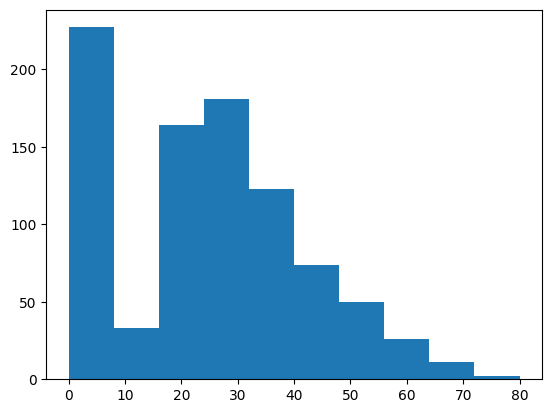

In [7]:
# 了解Age数据分布情况--直方图
from matplotlib import pyplot as plt
plt.hist(df_fill['Age'])

In [9]:
# 数据离散化  将连续的数据转化为区间，并用区间标号
df_fill['Age_bin'] = pd.cut(df_fill['Age'], [0, 5, 15, 30, 50, 80], right = False, labels = list('12345'))
df_fill.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,4


cut与qcut方法  qcut可以根据排名或基于样本分位数将变量离散为大小相等的桶

In [ ]:
df_fill['Age_bin'] = pd.qcut(df_fill['Age'], [0, 0.1, 0.3, 0.5, 0.7, 0.9], duplicates = 'drop', labels = list('1234'))
df_fill.head()

In [ ]:
# 处理文本数据
# 查看文本变量名及种类
df_fill['Sex'].unique()
df_fill['Cabin'].unique()

In [ ]:
# 将分类用数值变量表示
df_fill['Sex'].replace(['male', 'female'], [1,2], inplace = True)
df_fill.head()

In [ ]:
# 调用sklearn方法处理Cabin与Embarked---哑编码
from sklearn.preprocessing import LabelEncoder
df['Cabin'] = LabelEncoder().fit_transform (df['Cabin'])
df.head( )

In [ ]:
df['Embarked'] = LabelEncoder().fit_transform (df['Embarked'])
df.head( )

In [11]:
# 数据热编码
df_one_hot = pd.get_dummies(df_fill['Age'], prefix = 'Age')
df_one_hot

,Age_0.0,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,Age_2.0,Age_3.0,Age_4.0,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in ['Cabin', 'Embarked']:
    df_one_hot = pd.get_dummies(df_fill[column], prefix = column)
    df = pd.concat([df, df_one_hot], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,True


从文本数据中提取出Titles的特征，使用正则表达式

In [ ]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
df